In [7]:
import random
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")

In [6]:
# Load datasets from disk with transforms applied
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for CNNs
    transforms.ToTensor()])

train_data = datasets.INaturalist(root='data/train_mini', version="2021_train_mini", transform=transform, download=False)

train_data_sample_indices = random.sample(range(len(train_data)), 10000)


imgs = torch.stack([train_data[i][0] for i in train_data_sample_indices], dim=3)
sample_mean = imgs.view(3, -1).mean(dim=1)
sample_std = imgs.view(3, -1).std(dim=1)

In [9]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for CNNs
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=sample_mean, std=sample_std)
])

# Load datasets from disk with transforms applied
train_data = datasets.INaturalist(root='data/train_mini', version="2021_train_mini", transform=transform, download=False)
validation_data = datasets.INaturalist(root='data/validation', version="2021_valid", transform=transform, download=False)

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(validation_data, batch_size=32, shuffle=False, num_workers=4)

print(f"Training samples: {len(train_data)}")
print(f"Validation samples: {len(validation_data)}")

Training samples: 500000
Validation samples: 100000


In [10]:
cat_list = [int(cat[1:5]) for cat in train_data.all_categories if "Animalia_Chordata_Mammalia" in cat]
cat_list
# get corresponding labels

[4613,
 4614,
 4615,
 4616,
 4617,
 4618,
 4619,
 4620,
 4621,
 4622,
 4623,
 4624,
 4625,
 4626,
 4627,
 4628,
 4629,
 4630,
 4631,
 4632,
 4633,
 4634,
 4635,
 4636,
 4637,
 4638,
 4639,
 4640,
 4641,
 4642,
 4643,
 4644,
 4645,
 4646,
 4647,
 4648,
 4649,
 4650,
 4651,
 4652,
 4653,
 4654,
 4655,
 4656,
 4657,
 4658,
 4659,
 4660,
 4661,
 4662,
 4663,
 4664,
 4665,
 4666,
 4667,
 4668,
 4669,
 4670,
 4671,
 4672,
 4673,
 4674,
 4675,
 4676,
 4677,
 4678,
 4679,
 4680,
 4681,
 4682,
 4683,
 4684,
 4685,
 4686,
 4687,
 4688,
 4689,
 4690,
 4691,
 4692,
 4693,
 4694,
 4695,
 4696,
 4697,
 4698,
 4699,
 4700,
 4701,
 4702,
 4703,
 4704,
 4705,
 4706,
 4707,
 4708,
 4709,
 4710,
 4711,
 4712,
 4713,
 4714,
 4715,
 4716,
 4717,
 4718,
 4719,
 4720,
 4721,
 4722,
 4723,
 4724,
 4725,
 4726,
 4727,
 4728,
 4729,
 4730,
 4731,
 4732,
 4733,
 4734,
 4735,
 4736,
 4737,
 4738,
 4739,
 4740,
 4741,
 4742,
 4743,
 4744,
 4745,
 4746,
 4747,
 4748,
 4749,
 4750,
 4751,
 4752,
 4753,
 4754,
 4755,

In [ ]:
mammal_indices = []
for i, (_, label) in enumerate(train_data):
    print(i, label)
    if label > 4858:
        break
    if label >= 4613 and label <= 4858:
        mammal_indices.append(i)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 2
101 2
102 2
103 2
104 2
105 2
106 2
107 2
108 2
109 2
110 2
111 2
112 2
113 2
114 2
115 2
116 2
117 2
118 2
119 2
120 2
121 2
122 2
123 2
124 2
125 2
126 2
127 2
128 2
129 2
130 2
131 2
132 2
133 2
134 2
135 2
136 2
137 2
138 2
139 2
140 2
141 2
142 2
143 2
144 2
145 2
146 2
147 2
148 2
149 2
150 3
151 3
152 3
153 3
154 3
155 3
156 3
157 3
158 3
159 3
160 3
161 3
162 3
163 3
164 3
165 3
166 3
167 3
168 3
169 3
170 3
171 3
172 3
173 3
174 3
175 3
176 3
177 3
178 3
179 3
180 3
181 3
182 3
183 3
184 3


In [ ]:
from torch.utils.data import Subset

# Find all indices where the target (label) corresponds to mammals
# Create a subset dataset containing only mammals
train_data_mammals = Subset(train_data, mammal_indices)

# Create a DataLoader for the filtered dataset
train_loader_mammals = DataLoader(train_data_mammals, batch_size=256, shuffle=True, num_workers=4)

#mammal_indices_val = [i for i, (_, label) in enumerate(validation_data) if label in cat_list]
#val_data_mammals = Subset(validation_data, mammal_indices_val)
#val_loader_mammals = DataLoader(val_data_mammals, batch_size=32, shuffle=False, num_workers=4)

print(f"Filtered train dataset contains {len(train_data_mammals)} mammal images.")
#print(f"Filtered val dataset contains {len(val_loader_mammals)} mammal images.")

Filtered train dataset contains 12300 mammal images.


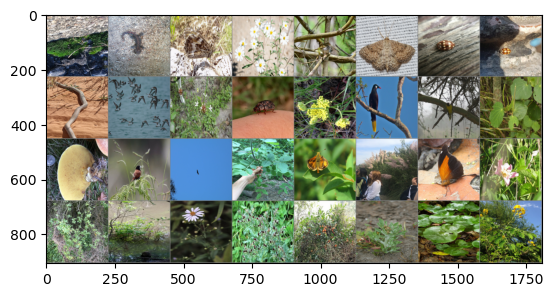

In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(make_grid(images))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


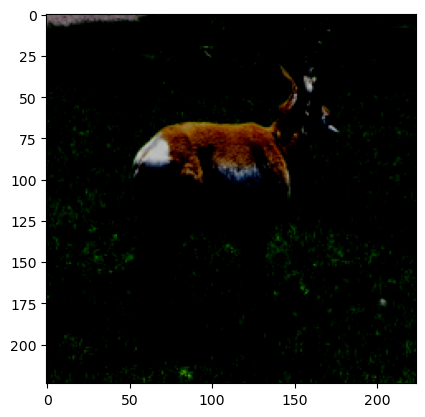

In [ ]:
plt.imshow(train_data_mammals[1][0].permute(1,2,0))

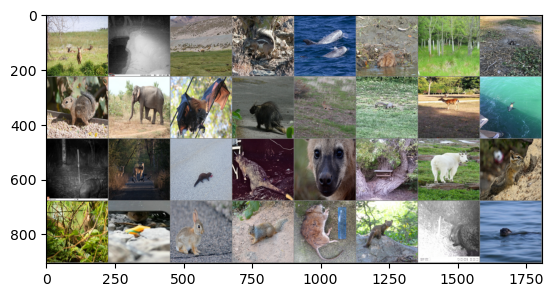

In [ ]:
# get some random training images
dataiter = iter(train_loader_mammals)
images, labels = next(dataiter)

# show images
imshow(make_grid(images))

In [ ]:
len(cat_list)

246

In [ ]:
n_classes = len(cat_list)
n_classes

246

In [ ]:
# Define a Simple CNN Model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 56 * 56, 128)  # 32 channels, 56x56 image size after pooling
        self.fc2 = nn.Linear(128, num_classes)   # Output layer
        
        # Dropout to prevent overfitting
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> MaxPool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> MaxPool
        x = x.view(x.shape[0], -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)  # Output layer
        return x

In [ ]:
def remap_labels(labels):
    return (labels - 4613).long()  # Convert labels to tensor and ensure they are Long type


def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set to training mode

    train_n = len(train_loader)
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            labels = remap_labels(labels).to(device)
            optimizer.zero_grad()  # Reset gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        # Print epoch stats
        print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader):.4f} - Accuracy: {100 * correct / total:.2f}%")


In [ ]:
simple_cnn = SimpleCNN(num_classes=n_classes).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(simple_cnn.parameters(), lr=0.005)

# Train the model
train_model(simple_cnn, train_loader_mammals, criterion, optimizer, epochs=200)

0 out of: 49
Epoch 1/200 - Loss: 5.7232 - Accuracy: 0.41%
0 out of: 49
Epoch 2/200 - Loss: 5.5061 - Accuracy: 0.34%
0 out of: 49
Epoch 3/200 - Loss: 5.5060 - Accuracy: 0.38%
0 out of: 49
Epoch 4/200 - Loss: 5.5046 - Accuracy: 0.38%
0 out of: 49
Epoch 5/200 - Loss: 5.4971 - Accuracy: 0.53%
0 out of: 49
Epoch 6/200 - Loss: 5.4891 - Accuracy: 0.43%
0 out of: 49
Epoch 7/200 - Loss: 5.4824 - Accuracy: 0.46%
0 out of: 49
Epoch 8/200 - Loss: 5.4686 - Accuracy: 0.44%
0 out of: 49
Epoch 9/200 - Loss: 5.4644 - Accuracy: 0.46%
0 out of: 49
Epoch 10/200 - Loss: 5.4629 - Accuracy: 0.54%
0 out of: 49
Epoch 11/200 - Loss: 5.4519 - Accuracy: 0.59%
0 out of: 49
Epoch 12/200 - Loss: 5.4386 - Accuracy: 0.63%
0 out of: 49
Epoch 13/200 - Loss: 5.4270 - Accuracy: 0.61%
0 out of: 49
Epoch 14/200 - Loss: 5.4075 - Accuracy: 0.72%
0 out of: 49
Epoch 15/200 - Loss: 5.3854 - Accuracy: 0.76%
0 out of: 49
Epoch 16/200 - Loss: 5.3648 - Accuracy: 0.84%
0 out of: 49
Epoch 17/200 - Loss: 5.3509 - Accuracy: 0.72%
0 out 

KeyboardInterrupt: 

In [49]:
class SimpleCNN_2(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN_2, self).__init__()

        # Convolutional layers (reduced sizes)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Batch Norm
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Find the correct input size for `fc1` dynamically
        self._to_linear = None
        self._compute_linear_input_size()

        # Fully connected layers
        self.fc1 = nn.Linear(self._to_linear, 512)  # Adjusted dynamically
        self.fc2 = nn.Linear(512, num_classes)

        # Dropout to prevent overfitting
        self.dropout = nn.Dropout(0.3)

    def _compute_linear_input_size(self):
        """Pass a dummy tensor through conv layers to determine flattened size."""
        with torch.no_grad():
            x = torch.randn(1, 3, 224, 224)  # Assuming input images are 224x224
            x = self.pool(F.relu(self.bn1(self.conv1(x))))
            x = self.pool(F.relu(self.bn2(self.conv2(x))))
            x = self.pool(F.relu(self.bn3(self.conv3(x))))
            self._to_linear = x.view(1, -1).shape[1]  # Flatten and get size

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(x.shape[0], -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [51]:
torch.cuda.empty_cache()

In [52]:
simple_cnn_2 = SimpleCNN_2(num_classes=n_classes).to(device)

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(simple_cnn_2.parameters(), lr=0.001)


# Train the model
train_model(simple_cnn_2, train_loader_mammals, criterion, optimizer, epochs=200)

0 out of: 385
100 out of: 385
200 out of: 385
300 out of: 385
Epoch 1/200 - Loss: 6.5715 - Accuracy: 0.29%
0 out of: 385
100 out of: 385
200 out of: 385
300 out of: 385
Epoch 2/200 - Loss: 5.5068 - Accuracy: 0.29%
0 out of: 385
100 out of: 385
200 out of: 385
300 out of: 385
Epoch 3/200 - Loss: 5.5068 - Accuracy: 0.25%
0 out of: 385
100 out of: 385
200 out of: 385
300 out of: 385
Epoch 4/200 - Loss: 5.5067 - Accuracy: 0.30%
0 out of: 385
100 out of: 385
200 out of: 385
300 out of: 385
Epoch 5/200 - Loss: 5.5067 - Accuracy: 0.26%
0 out of: 385
100 out of: 385
200 out of: 385
300 out of: 385
Epoch 6/200 - Loss: 5.5067 - Accuracy: 0.28%
0 out of: 385
100 out of: 385
200 out of: 385
300 out of: 385
Epoch 7/200 - Loss: 5.5067 - Accuracy: 0.26%
0 out of: 385
100 out of: 385
200 out of: 385
300 out of: 385
Epoch 8/200 - Loss: 5.5067 - Accuracy: 0.29%
0 out of: 385
100 out of: 385
200 out of: 385
300 out of: 385
Epoch 9/200 - Loss: 5.5067 - Accuracy: 0.20%
0 out of: 385
100 out of: 385
200 out

KeyboardInterrupt: 

In [53]:
mammal_classes = [cat for cat in train_data.all_categories if "Animalia_Chordata_Mammalia" in cat]

In [55]:
mammal_classes

['04613_Animalia_Chordata_Mammalia_Artiodactyla_Antilocapridae_Antilocapra_americana',
 '04614_Animalia_Chordata_Mammalia_Artiodactyla_Balaenopteridae_Balaenoptera_acutorostrata',
 '04615_Animalia_Chordata_Mammalia_Artiodactyla_Balaenopteridae_Megaptera_novaeangliae',
 '04616_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Aepyceros_melampus',
 '04617_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Alcelaphus_buselaphus',
 '04618_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Antidorcas_marsupialis',
 '04619_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Bison_bison',
 '04620_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Bos_taurus',
 '04621_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Boselaphus_tragocamelus',
 '04622_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Bubalus_bubalis',
 '04623_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Capra_hircus',
 '04624_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Capra_ibex',
 '04625_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Co

In [56]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in mammal_classes}
total_pred = {classname: 0 for classname in mammal_classes}

# again no gradients needed
with torch.no_grad():
    for data in train_loader_mammals:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        labels = remap_labels(labels).to(device)
        outputs = simple_cnn(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[mammal_classes[label]] += 1
            total_pred[mammal_classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 04613_Animalia_Chordata_Mammalia_Artiodactyla_Antilocapridae_Antilocapra_americana is 74.0 %
Accuracy for class: 04614_Animalia_Chordata_Mammalia_Artiodactyla_Balaenopteridae_Balaenoptera_acutorostrata is 60.0 %
Accuracy for class: 04615_Animalia_Chordata_Mammalia_Artiodactyla_Balaenopteridae_Megaptera_novaeangliae is 80.0 %
Accuracy for class: 04616_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Aepyceros_melampus is 50.0 %
Accuracy for class: 04617_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Alcelaphus_buselaphus is 62.0 %
Accuracy for class: 04618_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Antidorcas_marsupialis is 74.0 %
Accuracy for class: 04619_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Bison_bison is 64.0 %
Accuracy for class: 04620_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Bos_taurus is 48.0 %
Accuracy for class: 04621_Animalia_Chordata_Mammalia_Artiodactyla_Bovidae_Boselaphus_tragocamelus is 64.0 %
Accuracy for class: 04622_Animalia_Cho